<a href="https://colab.research.google.com/github/sofiavasqq/Vasquez_Labs/blob/main/Sofia_Vasquez_Stats_Midterm%2BIn_Class_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Midterm Project

Directions:

*   Use any and all resources available to you
*   Comment and explain the code
*   Answer the questions to the best of your abilities
*   There are no points for pain: ask for help

Save this notebook to your GitHub and submit the link.

https://colab.research.google.com/drive/1DkKEPTBXCTpGxFZTETEvXitXVyDovAl5?usp=sharing#scrollTo=SHTBrQ4mgs0Z

https://setosa.io/ev/ordinary-least-squares-regression/

## IN CLASS MIDTERM VERSION USING HAHN's DATA

In [321]:
import numpy as np
import matplotlib.pyplot as plt #the foundation

In [322]:
X = np.array([12,9,20,7,2])    # <- Put your numbers here  Diameter
Y = np.array([38,28,63,22,6])  #                           Circumference

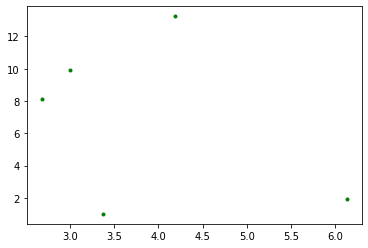

In [323]:
plt.plot(D,C,'g.') #tells us to plot d and c and make it a green dotted graph

In [324]:
m_guess = 0
b_guess = 0 #this tells the system that we do not knwo what m or b is yet

$y=mx+b$ (the basic slope formula equation)

In [325]:
m_guess * X + b_guess #creates a new system of numbers

array([0, 0, 0, 0, 0])

In [326]:
y_guess = m_guess * X + b_guess #trying to see how well our model fit our data

In [327]:
y_guess - Y #what this does is subtracts the value we gave the system to the line of best fit that the system made

array([-38, -28, -63, -22,  -6])

In [328]:
(y_guess - Y)**2 #squaring it so our negative numbers into postives aka getting rid of the negatives

array([1444,  784, 3969,  484,   36])

In [329]:
np.sum((y_guess - Y)**2)

6717

In [330]:
loss = np.sum((y_guess - Y)**2)

In [331]:
best_loss_so_far = 1000000000000 #finds the smallest loss out of all the possibilities
m_best = 0 
b_best = 0 
for m_guess in np.linspace(-100,100,100):
    for b_guess in np.linspace(-100,100,100):
        
        y_guess = m_guess * X + b_guess  #the system will nowtry to guess y using a number of posibilities from m and b by comparing it to the model

        loss = np.sum((y_guess - Y)**2)

        if loss < best_loss_so_far: #if the loss is better than anything we have seen so far the system will now replace it 
            m_best = m_guess
            b_best = b_guess
            best_loss_so_far = loss

print("Found best fit:")
print(m_best,b_best,loss) #now we know that we have a slope of 3, y intercept of 1 and the loss is 7378517
#we can now guess the circumference of the circle using the slope becuase this tells us the relationship between the diameter and the circumference

Found best fit:
3.030303030303031 1.0101010101010104 7378517.0


$C = (3.14) * diameter$

In [332]:
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Getting your data

Create a google form to input your data.
Follow the same method as [Lab 5](https://colab.research.google.com/drive/1zYvyhrz2wVnJXlZqj_PpxOxplfS3LN9Y?usp=sharing).

In [333]:
import pandas as pd
def get_database(url): # This function loads the google spreadsheet
    url_head = "https://docs.google.com/spreadsheets/d/"
    url_foot = "/gviz/tq?tqx=out:csv&sheet="
    url_body = url.split('/')[5]
    sheet_name = "1"
    url_csv = url_head + url_body + url_foot + sheet_name
    df = pd.read_csv(url_csv, sep=',', skiprows=0)
    return df

Put your form url here: https://forms.gle/SAvNRCebBBgXtnpn6


In [334]:
url = 'https://docs.google.com/spreadsheets/d/1avfaxzD4BkKr9z5vRyL2fYu5OhJX3MJiMRL3BPJktr8/edit?usp=sharing'  #url from survey spreadsheet

In [335]:
data = get_database(url) #gives us the data from the spreadsheet

In [336]:
data #running this alone will always print a mini spreasheet version of our data

,Timestamp,Diameter,Circumference
0,10/18/2022 11:28:47,3.0000,9.9375
1,10/18/2022 11:28:56,4.1875,13.2500
2,10/18/2022 11:29:07,2.6875,8.1250
3,10/18/2022 11:29:19,6.1250,1.9375
4,10/18/2022 11:29:28,3.3750,1.0000


In [337]:
data = np.array(data) #this command takes the data and turns it into a "numpy array"

In [338]:
data

array([['10/18/2022 11:28:47', 3.0, 9.9375],
       ['10/18/2022 11:28:56', 4.1875, 13.25],
       ['10/18/2022 11:29:07', 2.6875, 8.125],
       ['10/18/2022 11:29:19', 6.125, 1.9375],
       ['10/18/2022 11:29:28', 3.375, 1.0]], dtype=object)

In [339]:
data.shape #tells us the amount of responses we have

(5, 3)

In [340]:
Diameter = data[:,1] #this comand will help view what diameter of every circle that was in the data

In [341]:
Diameter 

array([3.0, 4.1875, 2.6875, 6.125, 3.375], dtype=object)

In [342]:
Circumference = data[:,2] #this comand will help view what circumference of every circle that was in the data

In [343]:
Circumference

array([9.9375, 13.25, 8.125, 1.9375, 1.0], dtype=object)

In [344]:
x = Diameter

In [345]:
x

array([3.0, 4.1875, 2.6875, 6.125, 3.375], dtype=object)

In [346]:
y = Circumference

In [347]:
y

array([9.9375, 13.25, 8.125, 1.9375, 1.0], dtype=object)

In [348]:
diameters = ([3.0,4.1875,2.6875,6.1250,3.3750])
circumferences = ([9.9375,13.2500, 8.1250, 1.9375, 1.0000])

In [349]:
X = np.array([3.0,4.1875,2.6875,6.1250,3.3750])    # <- Put your numbers here  Diameter
Y = np.array([9.9375,13.2500, 8.1250, 1.9375, 1.0000])  #                           Circumference

Plot your data points

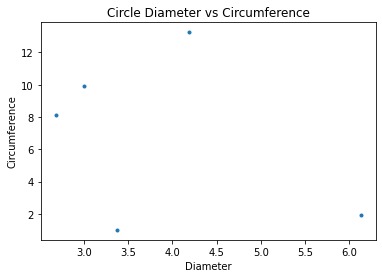

In [350]:
plt.title("Circle Diameter vs Circumference") #creates a general title for the entire graph

plt.xlabel('Diameter') #creates a label for the x axis
plt.ylabel('Circumference') #creates a label for the y axis

plt.plot(X,Y,'.');

In [351]:
x = D
y = C 

## Part 2: Linear Fit

Follow the steps in the [Linear Fit notebook]() to run a linear fit on your data.

In [352]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import urllib.request

In [353]:
url = "https://raw.githubusercontent.com/sofiavasqq/Vasquez_Labs/main/Circle%20Diameter%20vs%20Circumference%20-%20Form%20Responses%201.csv" #my circle data that was turned into a csv and uploaded into github

In [354]:
urllib.request.urlretrieve(url,'Circle Diameter vs Circumference - Form Responses 1.csv') #this will download the data into colab

('Circle Diameter vs Circumference - Form Responses 1.csv',
 <http.client.HTTPMessage at 0x7f79bf4bd490>)

In [355]:
circle_data = pd.read_csv('Circle Diameter vs Circumference - Form Responses 1.csv') #reads in the data using the panda

In [356]:
circle_data #now we are able see and read the data in colab

,Timestamp,Diameter,Circumference
0,10/18/2022 11:28:47,3.0000,9.9375
1,10/18/2022 11:28:56,4.1875,13.2500
2,10/18/2022 11:29:07,2.6875,8.1250
3,10/18/2022 11:29:19,6.1250,1.9375
4,10/18/2022 11:29:28,3.3750,1.0000


In [357]:
circle_data["Diameter"] # by using square brackets and "" we are able to view indivual columns in the data

0    3.0000
1    4.1875
2    2.6875
3    6.1250
4    3.3750
Name: Diameter, dtype: float64

In [358]:
circle_data["Circumference"] # by using square brackets and "" we are able to view indivual columns in the data

0     9.9375
1    13.2500
2     8.1250
3     1.9375
4     1.0000
Name: Circumference, dtype: float64

In [359]:
X = circle_data[["Diameter"]] #makes the x value on the graph the Diameters column from our data
Y = circle_data[["Circumference"]] #makes the y value on the graph the Circumferences column from our data

In [360]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression() 

In [361]:
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

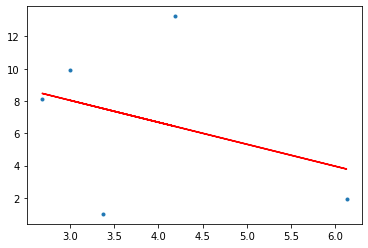

In [362]:
plt.plot(X, Y,'.') #tells the system to plot our x and y values as a dotted graph
plt.plot(X, Y_pred, color='red') #tells the system to make the line of best fit red
plt.show() #tells the system to display the graph just made

In [363]:
m_guess = 0 
b_guess = 0

$y=mx+b$ (the basic slope formula equation)

In [364]:
m_guess * X + b_guess #creates a new system of numbers

,Diameter
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [365]:
y_guess = m_guess * X + b_guess #trying to see how well our model fit our data

In [366]:
y_guess - Y #what this does is subtracts the value we gave the system to the line of best fit that the system made

,Circumference,Diameter
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [367]:
(y_guess - Y)**2 #squaring it so our negative numbers into postives aka getting rid of the negatives

,Circumference,Diameter
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [368]:
np.sum((y_guess - Y)**2)

Circumference    0.0
Diameter         0.0
dtype: float64

In [369]:
loss = np.sum((y_guess - Y)**2)

In [370]:
x

array([3.    , 4.1875, 2.6875, 6.125 , 3.375 ])

In [371]:
m_guess * x

array([0., 0., 0., 0., 0.])

In [372]:
m_guess * x + b_guess

array([0., 0., 0., 0., 0.])

In [373]:
y_Guess = m_guess * x + b_guess

In [ ]:
best_loss = 1000000000
best_m = 0 #putting in 0 tells the system that we have no idea what m or b should be
best_b = 0 

for m_guess in np.linspace(-100,100,100):
    for b_guess in np.linspace(-100,100,100):
        
        print("Now Testing; ", m_guess,b_guess)
        y_guess = m_guess * x + b_guess

        loss = np.sum((y_guess - y)**2)

        if loss < best_loss:
            
            best_loss = loss
            best_m = m_guess
            best_b = b_guess 

print("Found best fit:")
print(m_best,b_best,loss) #now we know that we have a slope of 3, y intercept of 1 and the loss is 7378517
#we can now guess the circumference of the circle using the slope becuase this tells us the relationship between the diameter and the circumference

Now Testing;  -100.0 -100.0
Now Testing;  -100.0 -97.97979797979798
Now Testing;  -100.0 -95.95959595959596
Now Testing;  -100.0 -93.93939393939394
Now Testing;  -100.0 -91.91919191919192
Now Testing;  -100.0 -89.8989898989899
Now Testing;  -100.0 -87.87878787878788
Now Testing;  -100.0 -85.85858585858585
Now Testing;  -100.0 -83.83838383838383
Now Testing;  -100.0 -81.81818181818181
Now Testing;  -100.0 -79.79797979797979
Now Testing;  -100.0 -77.77777777777777
Now Testing;  -100.0 -75.75757575757575
Now Testing;  -100.0 -73.73737373737373
Now Testing;  -100.0 -71.71717171717171
Now Testing;  -100.0 -69.69696969696969
Now Testing;  -100.0 -67.67676767676767
Now Testing;  -100.0 -65.65656565656565
Now Testing;  -100.0 -63.63636363636363
Now Testing;  -100.0 -61.61616161616161
Now Testing;  -100.0 -59.59595959595959
Now Testing;  -100.0 -57.57575757575757
Now Testing;  -100.0 -55.55555555555555
Now Testing;  -100.0 -53.53535353535353
Now Testing;  -100.0 -51.515151515151516
Now Testing;

## Part 3: Interpretation

Answer the questions in text cells

#### Question 1:

What do $m$ and $b$ represent in these equations?

*   $m$ represents the slope in a linear equation.
*   $b$ represents the y intercept in a linear equation. 
*   The basic equation for a linear equation should be $y=mx+b$.



#### Question 2:

Guess what the correct values $m$ and $b$ should be.

*   Based on the data used in class, the correct slope should be 3 and the correct y intercept should be 1.
*   Based on the data I collected, it says that my best slope is 0 and the y intercept is also 0. I believe that this happened because there is an error in my code.



#### Question 3:

Does it make sense to include $b$ in the parameters?



*   If b is 0, then no, it does not make sense to include it in the parameters because it has no effect on the actual equation.
If b is higher or lower than 0, then yes, it does make sense to include it in the parameters because it has an effect on the equation. Does not matter how small that number is, as long as it is not 0.



## Bonus:

These problems are extra credit. You may use any resources, but be sure to explain your code.

#### Bonus 1: Plot the squared errors from your line of best fit

In [ ]:
plt.title("Fit Errors")

plt.xlabel("Diameter")
plt.ylabel("Squared Error")

squared_error = y = [11,20,19,17,10]
y_bar = [12,18,19.5,18,9]
summation = 0  #variable to store the summation of differences
n = len(y) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
  difference = y[i] - y_bar[i]  #finding the difference between observed and predicted value
  squared_difference = difference**2  #taking square of the differene 
  summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print ("The Mean Square Error is: " , MSE)

plt.plot(D,C, 'b.', label = "Errors")

plt.legend();

#### Bonus 2: Plot the errors as a histogram

In [ ]:
plt.title("Errors")

import numpy as np
import pylab as plt

data       = np.array(np.random.rand(1000))
y,binEdges = np.histogram(data,bins=10)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
menStd     = np.sqrt(y)
width      = 0.05
plt.bar(bincenters, y, width=width, color='r', yerr=menStd)
plt.show()

What distribution does this histogram look like?

#### Bonus 3: Find the circle with the largest error. 
Hint: use np.max

In [ ]:
import numpy as np
np.random.seed(22)
np_array_1d = X = np.array([3.0,4.1875,2.6875,6.1250,3.3750])    # <- Put your numbers here  Diameter
Y = np.array([9.9375,13.2500, 8.1250, 1.9375, 1.0000])  #                           Circumference
print(np_array_1d)

In [ ]:
largest_error = np.max(np_array_1d)

In [ ]:

largest_error

#### Bonus 4: Remove the circles with the 2 largest errors and run the fit again.


In [ ]:
X = np.array([3.0,2.6875,3.3750])    # <- Put your numbers here  Diameter
Y = np.array([9.9375, 8.1250, 1.0000])  #                           Circumference

In [ ]:
plt.title("Circle Diameter vs Circumference") #creates a general title for the entire graph

plt.xlabel('Diameter') #creates a label for the x axis
plt.ylabel('Circumference') #creates a label for the y axis

plt.plot(X,Y,'.');

In [ ]:
best_loss_so_far = 1000000000000 #finds the smallest loss out of all the possibilities
m_best = 0 
b_best = 0 
for m_guess in np.linspace(-100,100,100):
    for b_guess in np.linspace(-100,100,100):
        
        y_guess = m_guess * X + b_guess  #the system will nowtry to guess y using a number of posibilities from m and b by comparing it to the model

        loss = np.sum((y_guess - Y)**2)

        if loss < best_loss_so_far: #if the loss is better than anything we have seen so far the system will now replace it 
            m_best = m_guess
            b_best = b_guess
            best_loss_so_far = loss

print("Found best fit:")
print(m_best,b_best,loss) #now we know that we have a slope of 3, y intercept of 1 and the loss is 7378517
#we can now guess the circumference of the circle using the slope becuase this tells us the relationship between the diameter and the circumference

What is the difference in your error?





*   A major difference when removing my two largest errors was that the loss I got is much smaller.
*   The error I got after removing my two largest errors was 472,731.39453125.
*   The error I got with my original data before taking out the two largest errors was 1,233,160.7109375.






#### Bonus 5: Find and explain a better method of fitting this data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#define data
X = np.array([3.0,4.1875,2.6875,6.1250,3.3750])    # <- Put your numbers here  Diameter
Y = np.array([9.9375,13.2500, 8.1250, 1.9375, 1.0000])  # Circumference

#find line of best fit
a, b = np.polyfit(X, Y, 1)

#add points to plot
plt.scatter(X, Y, color='purple')

#add line of best fit to plot
plt.plot(x, a*x+b, color='steelblue', linestyle='--', linewidth=2)

#add fitted regression equation to plot
plt.text(1, 17, 'y = ' + '{:.2f}'.format(b) + ' + {:.2f}'.format(a) + 'x', size=14)